In [1]:
pip install bnlp_toolkit

     |████████████████████████████████| 23.9 MB 96 kB/s 
     |████████████████████████████████| 1.2 MB 50.9 MB/s 
     |████████████████████████████████| 743 kB 54.4 MB/s 
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [2]:
pip install bnltk

In [3]:
pip install -U bnlp_toolkit

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from bnlp.corpus import stopwords
from bnlp.corpus.util import remove_stopwords

from bnltk.stemmer import BanglaStemmer

punkt not found. downloading...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


/usr/local/lib/python3.7/dist-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [5]:
from google.colab import drive
dataset=pd.read_csv('/content/abusiveCommentInSocialMedia.csv')

Abusive: 7500.00%, Non-abusive: 7500.00%


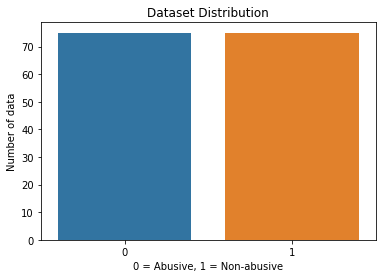

In [23]:
import seaborn as sns
target_vc = dataset["class"].value_counts(normalize=False)
print("Abusive: {:.2%}, Non-abusive: {:.2%}".format(target_vc[0], target_vc[1]))
sns.barplot(x=target_vc.index, y=target_vc)
plt.title("Dataset Distribution")
plt.xlabel("0 = Abusive, 1 = Non-abusive")
plt.ylabel("Number of data")
plt.show()

In [24]:
dataset.shape

(150, 2)

In [9]:
#cleaning the texts
import re
corpus=[]
for i in range(0,150):
    review = re.sub('[‘’“”…,।.?"]', ' ', dataset['text'][i])
    review = re.sub('\n', '', review)
    bn_stemmer = BanglaStemmer()
    review=bn_stemmer.stem(review)
    review = remove_stopwords(review, stopwords)
    review=' '.join(review)
    corpus.append(review)
corpus

['পরিমনি চামড়ার দোকান',
 'সত্যি পরিমনি হিজলা কোনটা',
 'প্রেমে অন্ধ ভালোবাসা',
 'আল্লাহ্ লম্বা চুল দিয়েছিলো বলেই লজ্জা স্থানটুকু ঝাঁকতে পের',
 'পিক দেখলে ছেলেরা তোমায় ধর্ষণ এটাও স্বাভাবিক',
 'মেম্বার আপন',
 'দেহ ব্যবসায়ী পরিমনি',
 'দারুন পরি মনি',
 'নিচের অবস্থা ত বেহাল দশা ইলিয়াস ভাই কৈই',
 'ওহে সুন্দর বন্ধু মন লাগে রুপ লাগে',
 'সুন্দর',
 'পারলে ন্যাংটা হয়ে থাক',
 'তুই একটা ভেসা মাগি',
 'ইয়া আল্লাহ অন্তরে দুঃখ কষ্টের পাথর জমে অন্তরকে ধৈর্য দিয়ে প্রশান্তি দা',
 'বন্ড সিরিজ মুভি মানেই এক আবেদন কটিই দেখেছি সিরিজটা দেখার দের বছর অপেক্ষা করছি একশন এডভেঞ্চার সাসপেন্স রোমান্স ! চেয়ে আসল কথা ফ্লিমের প্রতিটি চরিত্র সুন্দর ফুটিয়ে তোলা সত্যিই চমৎকার',
 'অপেক্ষায় আছি',
 'পেইজে বিখ্যাত কবি - সাহিত্যিকের পঙক্তি নিয়মিত পোস্ট হ',
 'আফগানিস্তানের সাথে বাংলাদেশের বন্ধুত্ব করাবেন',
 'তোরে ভালো করতাম তুই নমোকে লাইভে আসছিস নির্লজ্জ কোথাকার দুনিয়া মরে দেখ তোরে কবরে সৃজিতকে দেবে তোর সাথে ফাজিল এক',
 'আলো বাজে মহিলাকে প্রচারণা রাস্তার মহিলার সম্মান মহিলার',
 'চেহারায়তো মোটামুটি একটা গাজাখোরী চাপ পড়ছে বোঝা 

In [10]:
# TF-IDF process
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer()
X= cv.fit_transform(corpus).toarray()
y= dataset.iloc[:, 1].values
print(X)
print(y)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.27980115 ... 0.30286626 0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
[1 1 0 1 1 0 1 0 1 0 1 1 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1
 1 1 1 0 0 0 0 1 1 1 1 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 1 0 1 0 0 0 0 0 1
 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 1 1
 1 1 1 1 0 0 0 1 1 1 0 0 0 0 1 1 1 0 0 0 0 1 1 0 1 1 1 0 1 1 0 0 0 0 0 0 0
 0 0]


In [11]:
#Splitting the dataset into training set and test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=0)
print(X)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.27980115 ... 0.30286626 0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [12]:
# Fitting Decision Tree to the training set
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(criterion="entropy", random_state=0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [13]:
#predicting the Test set results
y_pred=classifier.predict(X_test)

In [25]:
#Making the confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
print(cm)

[[ 5 10]
 [ 3 12]]


In [15]:
#finding accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)

0.5666666666666667


In [16]:
#finding Recall
from sklearn.metrics import recall_score
recall=recall_score(y_test,y_pred,average="binary")
print('Recall %.3f'%recall)

Recall 0.800


In [17]:
#finding Precision
from sklearn.metrics import precision_score
precision=precision_score(y_test,y_pred,average="binary")
print('precision %.3f'%precision)

precision 0.545


In [18]:
#finding F1-score
from sklearn.metrics import f1_score
f1=f1_score(y_test,y_pred,average="binary")
print('f1_score %.3f'%f1)

f1_score 0.649
